In [78]:
pip install dataprep.eda

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dataprep.eda (from versions: none)
ERROR: No matching distribution found for dataprep.eda

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement spacy (from versions: none)
ERROR: No matching distribution found for spacy

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os

# For managing warning messages.
import warnings

# Report
#from dataprep.eda import create_report

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime
# NLP
#import spacy

# Establishing database and file system connections.
#from google.colab import drive
 #SQL lit
import pymongo

# Statistical analysis and hypothesis testing.
from scipy import stats

# Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# Balancing the data to address class imbalance.
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek
#from sklearn.utils import resample

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Identifying algorithms/Model
#from lazypredict.Supervised import LazyRegressor, LazyClassifier

# Machine Learning : Training
from xgboost import plot_importance
# Regression
#import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
# Cluster
from sklearn.cluster import KMeans

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

In [2]:
df=pd.read_csv("C:/Users/PRIYAN/Downloads/unemployment.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.tail(20)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
748,West Bengal,31-01-2020,Monthly,7.27,11208617.0,45.39,Urban
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace=True)

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [10]:
df.shape

(740, 7)

In [11]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Region,28
Date,14
Frequency,2
Estimated Unemployment Rate (%),624
Estimated Employed,740
Estimated Labour Participation Rate (%),626
Area,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
continuous_columns = ["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]
category_columns = ["Region","Frequency","Area"]

In [14]:
#Select categorical columns from DataFrame efficiently.
category_str = ["Date","Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]
string_columns = df.select_dtypes(exclude=['int64',"float64"]).columns
numeric_columns = df.select_dtypes(include=['int',"float64"]).columns


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [16]:
df[string_columns].describe().T

,count,unique,top,freq
Region,740,28,Andhra Pradesh,28
Date,740,14,31-10-2019,55
Frequency,740,2,Monthly,381
Area,740,2,Urban,381


In [17]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [18]:
df.duplicated().sum()

0

###Correlation

In [19]:
# Calculating correlation between column.
# Remove the column if it correlated from 0.7 to 1 because it highly correlated.

In [20]:
numeric_df=df[numeric_columns]

In [21]:
numeric_df.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


In [22]:
correlation_matrix = numeric_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

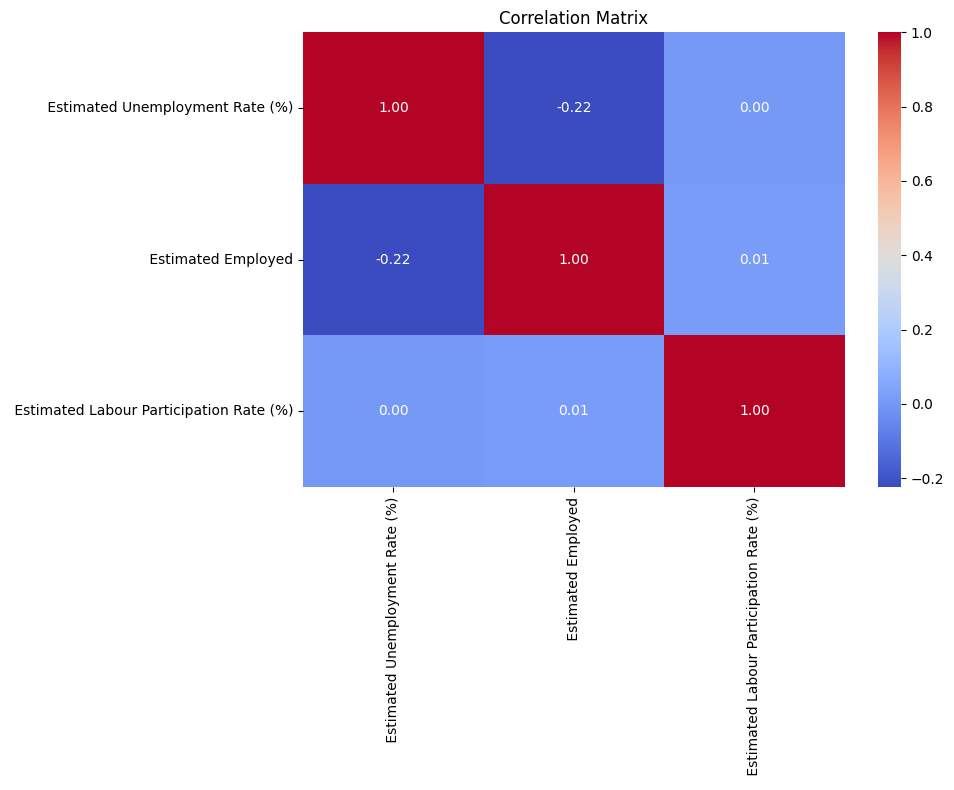

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [24]:
# To test only numerical features
numerical_df = df.select_dtypes(['float32','int'])
numerical_df.corr()

""


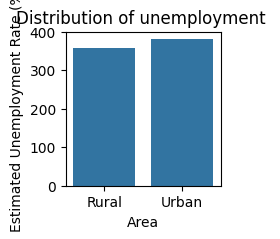

In [25]:
#distribution of categorical data 
# Bar plot
plt.figure(figsize=(2, 2))
sns.countplot(data=df, x='Area')
plt.title('Distribution of unemployment ')
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

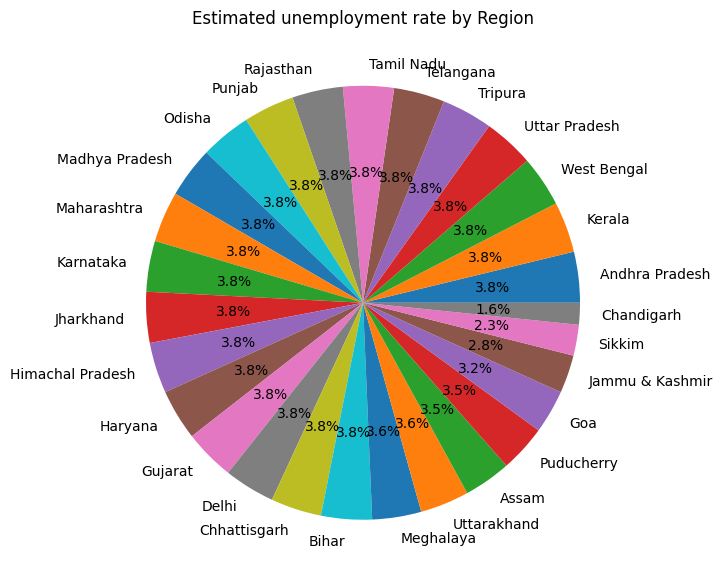

In [26]:
# Pie chart
plt.figure(figsize=(7,8))
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Estimated unemployment rate by Region')
plt.ylabel('')
plt.show()

### Distribution of continious data  

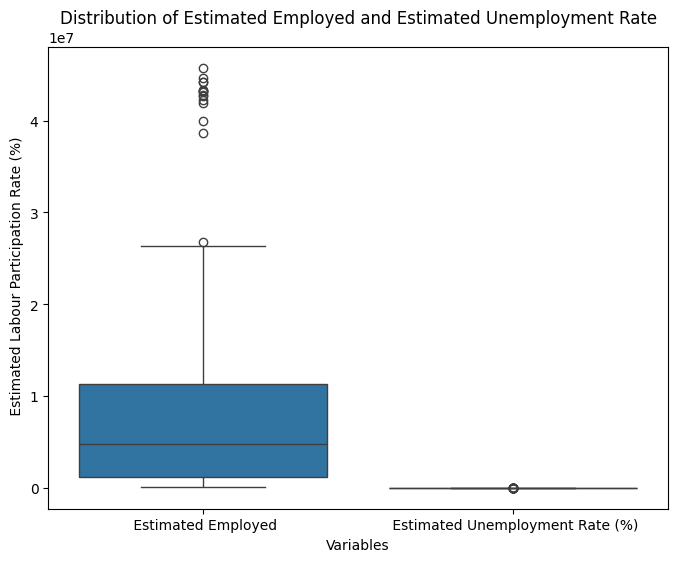

In [27]:
# Plotting code
plt.figure(figsize=(8, 6))  # Adjusted figsize for better visibility
sns.boxplot(data=df[[' Estimated Employed', ' Estimated Unemployment Rate (%)']])
plt.title('Distribution of Estimated Employed and Estimated Unemployment Rate')
plt.ylabel(' Estimated Labour Participation Rate (%)')
plt.xlabel('Variables')
plt.show()


In [28]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

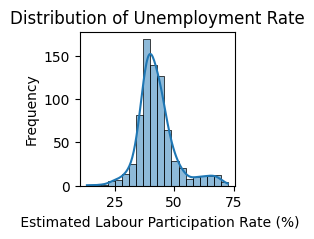

In [29]:
# Histogram
plt.figure(figsize=(2, 2))
sns.histplot(data=df, x=' Estimated Labour Participation Rate (%)', bins=20, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel(' Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

###continious vs continious

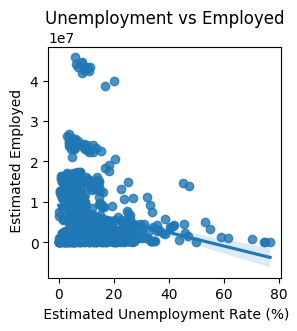

In [30]:
# Scatter plot with trend line
plt.figure(figsize=(3, 3))
sns.regplot(data=df, x=' Estimated Unemployment Rate (%)', y=' Estimated Employed')
plt.title('Unemployment vs Employed')
plt.xlabel(' Estimated Unemployment Rate (%)')
plt.ylabel(' Estimated Employed')
plt.show()

###continious vs categorical

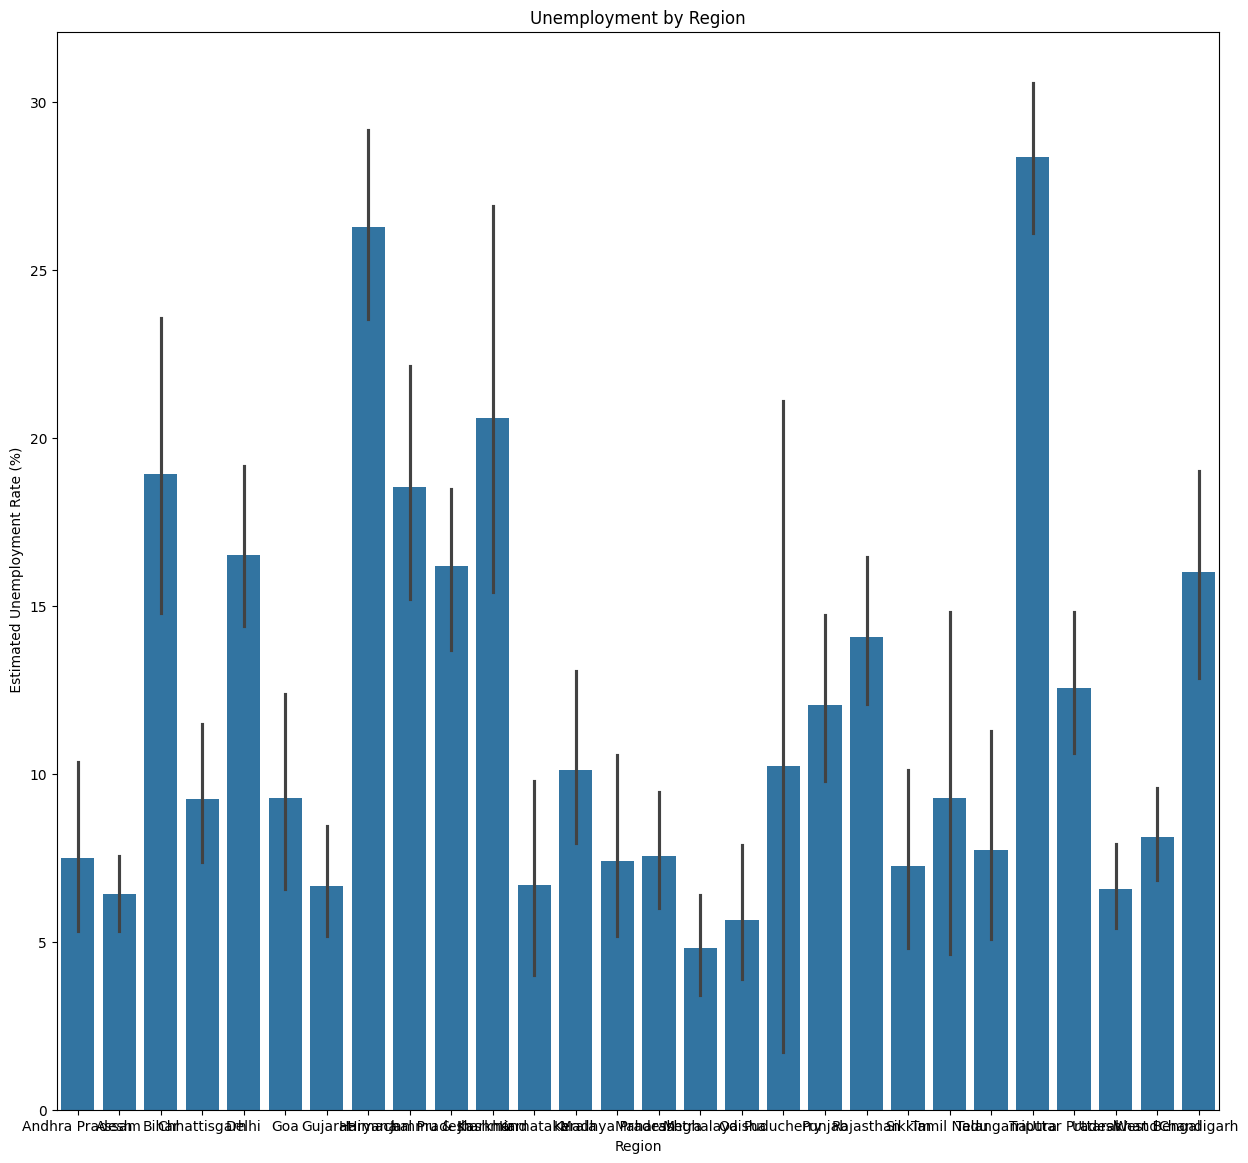

In [31]:
# Bar plot
plt.figure(figsize=(15, 14))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment by Region')
plt.xlabel('Region')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.show()

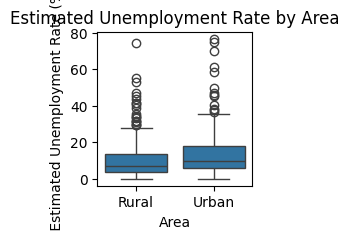

In [32]:
  # Box plot
plt.figure(figsize=(2, 2))
sns.boxplot(data=df, x='Area', y=' Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel(' Estimated Unemployment Rate (%)')
plt.show()

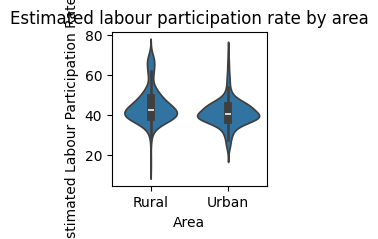

In [33]:
# Violin plot
plt.figure(figsize=(2, 2))
sns.violinplot(data=df, x='Area', y=' Estimated Labour Participation Rate (%)')
plt.title('Estimated labour participation rate by area')
plt.xlabel('Area')
plt.ylabel(' Estimated Labour Participation Rate (%)')
plt.show()

### categorical vs categorical

In [34]:
# Contingency table
contingency_table = pd.crosstab(df['Area'], df['Region'])
print(contingency_table)

Region  Andhra Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  Delhi  Goa  \
Area                                                                         
Rural               14     12     14           0            14     14   12   
Urban               14     14     14          12            14     14   12   

Region  Gujarat  Haryana  Himachal Pradesh  ...  Puducherry  Punjab  \
Area                                        ...                       
Rural        14       14                14  ...          12      14   
Urban        14       14                14  ...          14      14   

Region  Rajasthan  Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
Area                                                                       
Rural          14       5          14         14       14             14   
Urban          14      12          14         14       14             14   

Region  Uttarakhand  West Bengal  
Area                              
Rural            13        

In [35]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

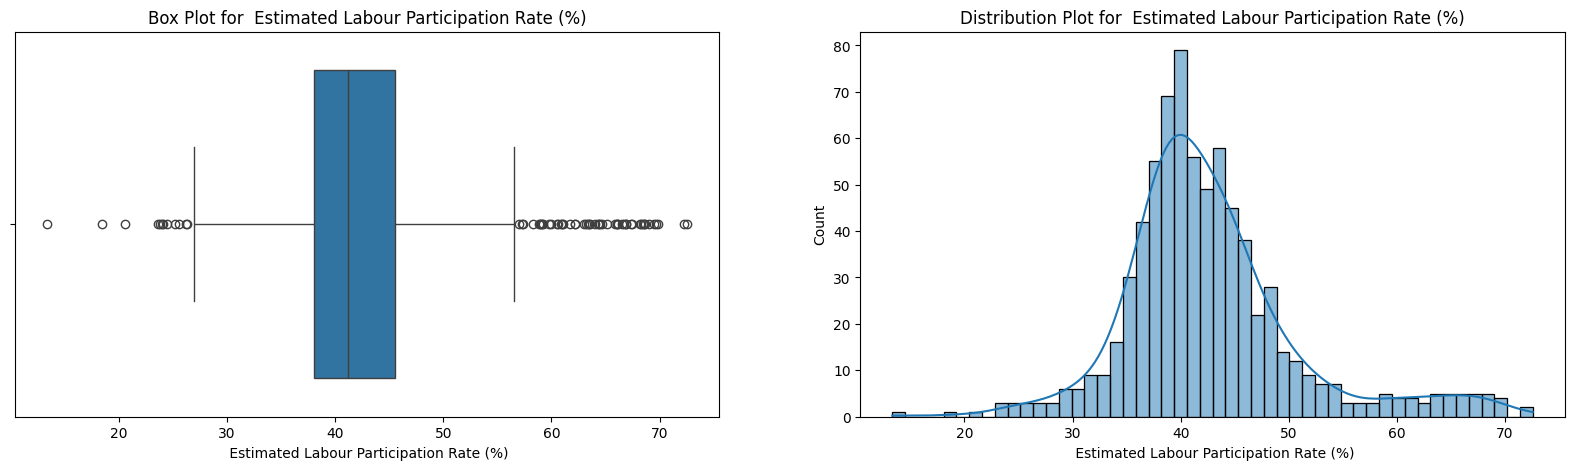

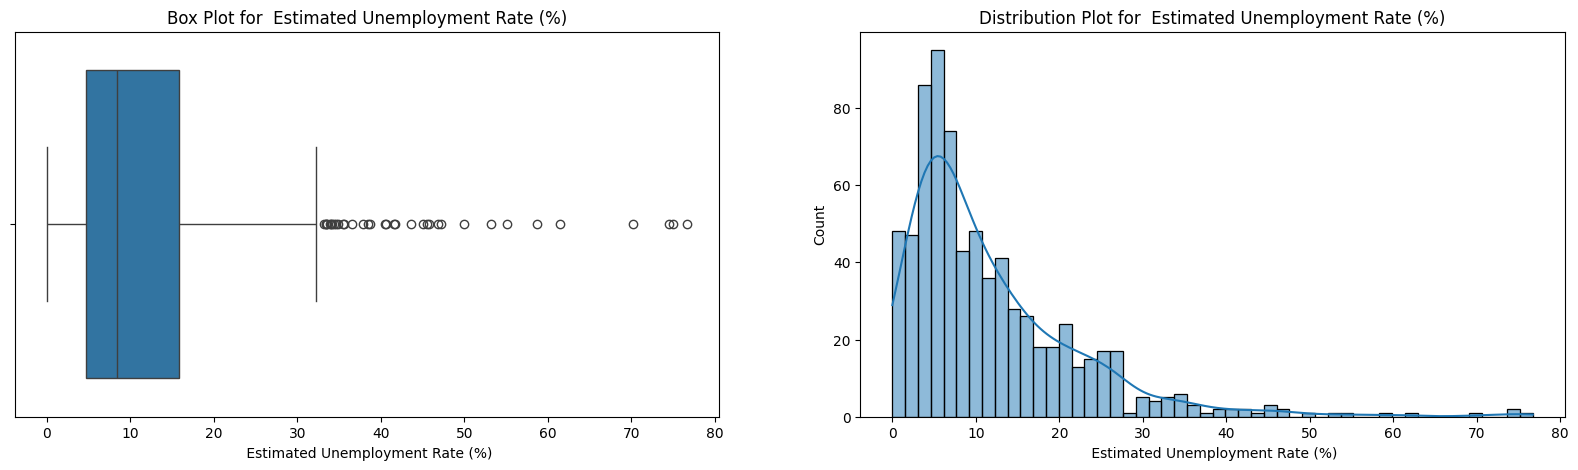

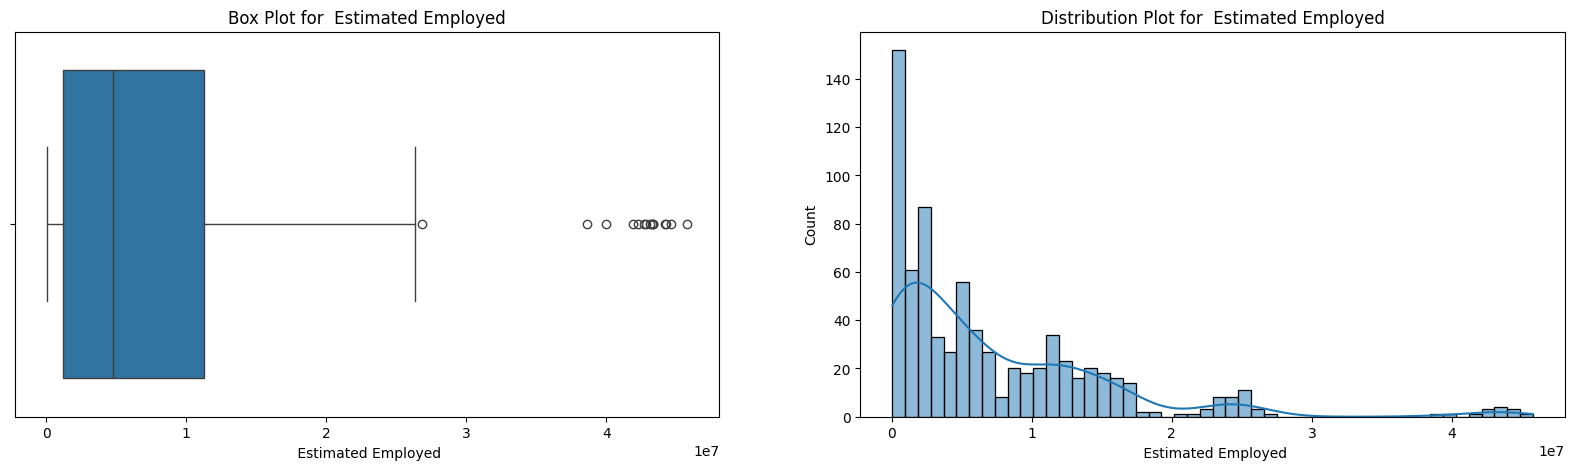

In [36]:
for i in [' Estimated Labour Participation Rate (%)', ' Estimated Unemployment Rate (%)', ' Estimated Employed']:
    plot(df, i)

In [37]:
def plot_pairplot(df):
    sns.pairplot(df)
    plt.title('Pairplot of Select columns')
    plt.show()

### Data Preprocessing

In [38]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

###Handling outliers

### Using Z score

In [39]:
from scipy import stats
# Select the columns you want to analyze for outliers (assuming numeric columns)
columns_to_analyze = [' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']

# Calculate z-scores for selected columns
z_scores = stats.zscore(df[columns_to_analyze])

# Set the threshold for detecting outliers (e.g., 3)
threshold = 3

# Create a mask for outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Replace outliers with NaN values
df.loc[outliers_mask.any(axis=1), columns_to_analyze] = np.nan

# Now you can handle NaN values using methods like filling with mean, median, or dropping rows/columns as needed


###IQR

In [40]:
# IQR (Interquartile range)
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

### Handling skewness

In [41]:
df[' Estimated Unemployment Rate (%)'].skew()

1.2118779527287467

### ENCODING

In [45]:
# Columns to encode
encode_cols = ['Region',' Frequency','Area']

# Initialize LabelEncoder for the target labels
le_dict = {}

for col in encode_cols:
    # Initialize LabelEncoder
    le = LabelEncoder()
    # Fit LabelEncoder on unique values of the column and transform the column
    encoded_values = le.fit_transform(df[col])
    # Update DataFrame with encoded values
    df[col] = encoded_values
    # Save the LabelEncoder object for later use
    le_dict[col] = le

# Save the LabelEncoder objects using pickle
for col, le in le_dict.items():
    with open(col + '_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)

In [48]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,0,31-05-2019,0,3.65,11999139.0,43.24,0
1,0,30-06-2019,0,3.05,11755881.0,42.05,0
2,0,31-07-2019,0,3.75,12086707.0,43.50,0
3,0,31-08-2019,0,3.32,12285693.0,43.97,0
4,0,30-09-2019,0,5.17,12256762.0,44.68,0
...,...,...,...,...,...,...,...
749,27,29-02-2020,1,7.55,10871168.0,44.09,1
750,27,31-03-2020,1,6.67,10806105.0,43.34,1
751,27,30-04-2020,1,15.63,9299466.0,41.20,1
752,27,31-05-2020,1,15.22,9240903.0,40.67,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaler_df=pd.DataFrame(scaler.transform(df))
scaler_df